# Lab | Random variable distributions
Refer to the files_for_lab/we_fn_use_c_marketing_customer_value_analysis.csv dataset.

## Instructions

In [21]:
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import power_transform

In [19]:
customers = pd.read_csv("we_fn_use_c_marketing_customer_value_analysis.csv")
customers.head()

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


## 1. Get the numerical variables from our dataset.

In [9]:
numerical = customers.select_dtypes(include="number")
display(numerical)
print(numerical.columns)

,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount
0,2763.519279,56274,69,32,5,0,1,384.811147
1,6979.535903,0,94,13,42,0,8,1131.464935
2,12887.431650,48767,108,18,38,0,2,566.472247
3,7645.861827,0,106,18,65,0,7,529.881344
4,2813.692575,43836,73,12,44,0,1,138.130879
...,...,...,...,...,...,...,...,...
9129,23405.987980,71941,73,18,89,0,2,198.234764
9130,3096.511217,21604,79,14,28,0,1,379.200000
9131,8163.890428,0,85,9,37,3,2,790.784983
9132,7524.442436,21941,96,34,3,0,3,691.200000


Index(['Customer Lifetime Value', 'Income', 'Monthly Premium Auto',
       'Months Since Last Claim', 'Months Since Policy Inception',
       'Number of Open Complaints', 'Number of Policies',
       'Total Claim Amount'],
      dtype='object')


## 2. Check using a distribution plot if the variables fit the theoretical normal or exponential distribution.

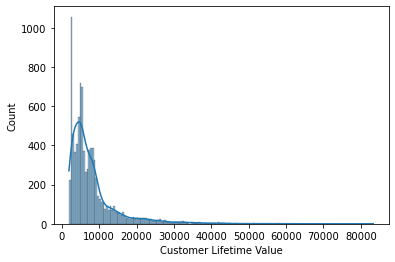

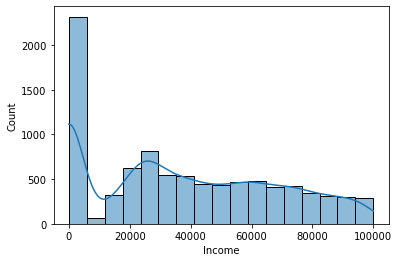

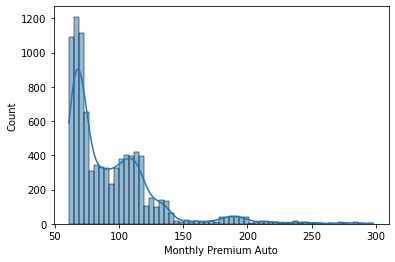

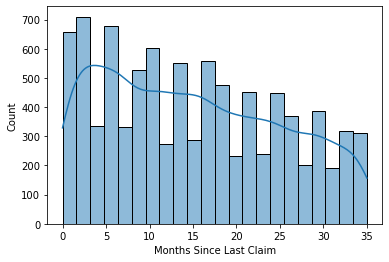

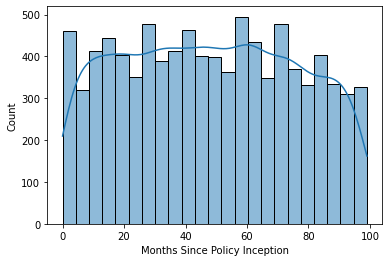

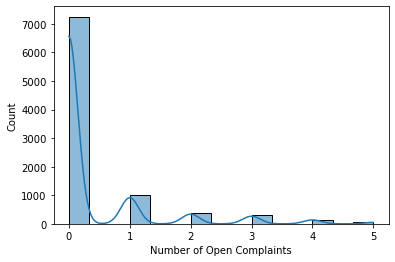

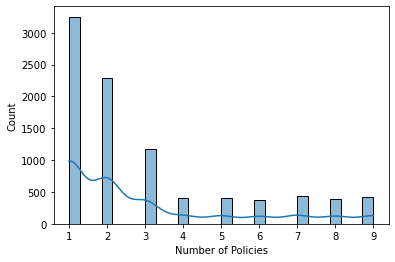

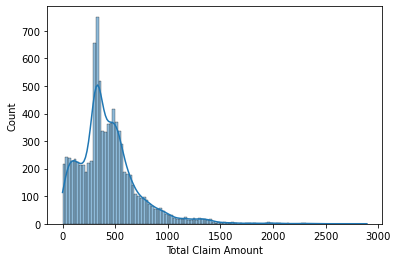

In [10]:
for col in numerical:
    sns.histplot(numerical[col], kde = True)
    plt.show()

Most of the columns seem like exp distributions, being "Months since Last Claim" and "Months Since Policy Inception" the most clear exceptions.
This latter resembles a uniform distribution, somehow.


## 3. Check if any of the transformations (log-transform, etc.) we have seen up to this point changes the result.

We will us the column "total Claim Amount" as an example

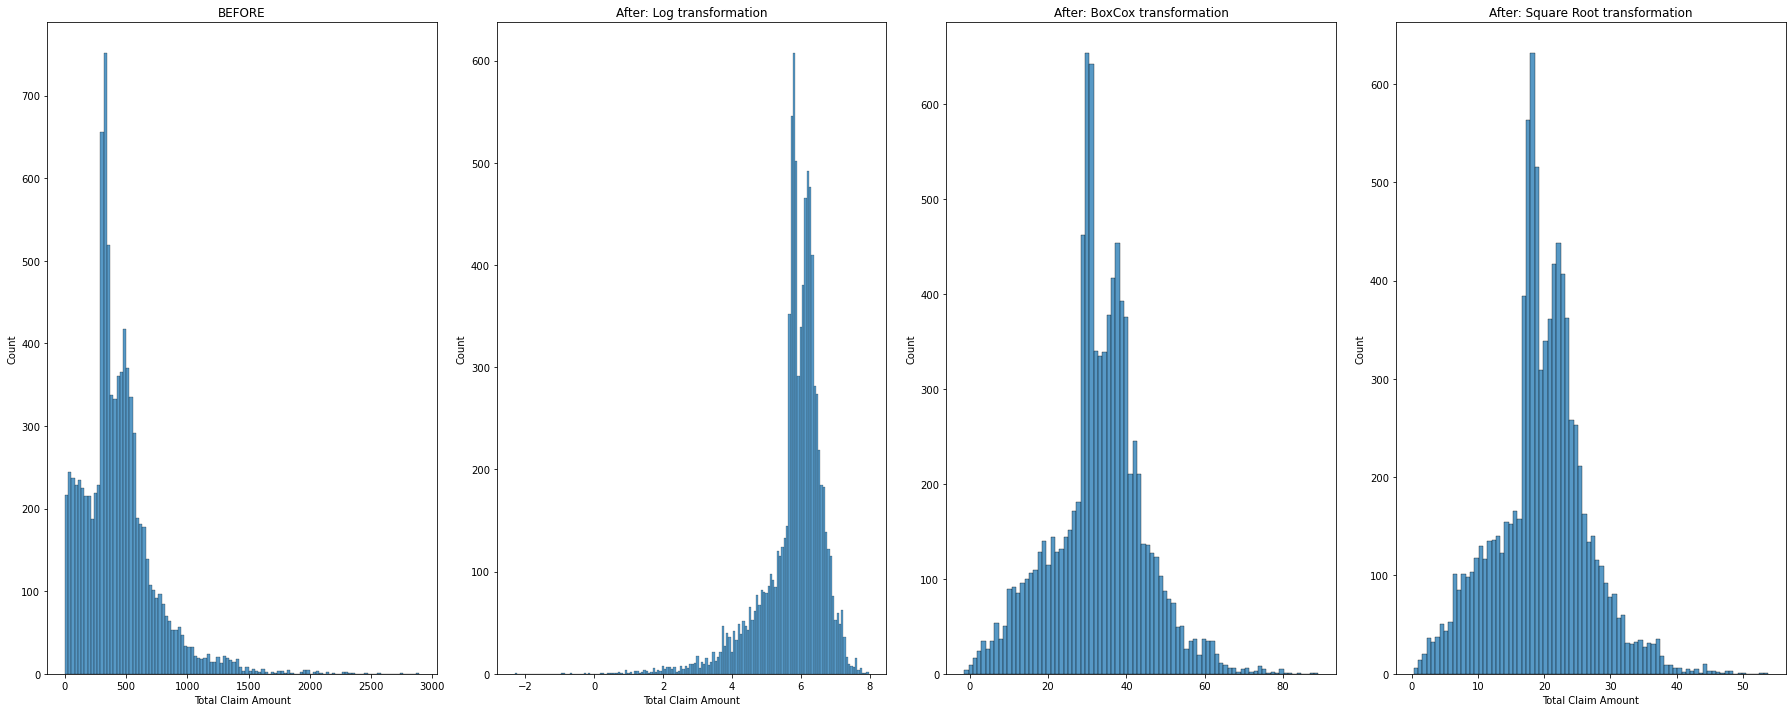

In [52]:
# Log Transformation, boxcox and square root transformation on Total Claim Amount
tca_log = np.log(numerical['Total Claim Amount'])
tca_bxcx = stats.boxcox(numerical['Total Claim Amount'])[0]
tca_sqrt = np.sqrt(numerical['Total Claim Amount'])

#SUBPLOTS
fig, ax = plt.subplots(1, 4, figsize = (25,10))

#PLOTS
sns.histplot(x = numerical['Total Claim Amount'], ax = ax[0])
sns.histplot(x = tca_log, ax = ax[1])
sns.histplot(x = tca_bxcx, ax = ax[2])
sns.histplot(x = tca_sqrt, ax = ax[3])

#TITLES
ax[0].set_title('BEFORE')
ax[1].set_title('After: Log transformation')
ax[2].set_title('After: BoxCox transformation')
ax[3].set_title('After: Square Root transformation')
plt.tight_layout()

plt.show()